In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def makeX(df):
    return df.iloc[0:df.shape[0], 1:t_data.shape[1]].values
def makeY(df):
    return df.iloc[0:df.shape[0],1].values

In [3]:
def bar(X):
    X = np.transpose(X)
    a = [np.full(5000,1)]
    X = np.append(X,a,0)
    return X

In [4]:
def ridge(X,Y,lam):
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D)
    return W                              #, W[W.shape[0]-1]

In [5]:
def Loocv(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    W = ridge(X,Y,lam)
    for i in (0,4999):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - np.dot(np.dot(xi.T,Cinv),xi)))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    rmse = np.sqrt(add/5000)
    return rmse

In [6]:
def predict(X,W):
    pred = np.dot(X.T,W)
    return pred

In [7]:
def rmse(vl, pred):
    add = 0
    err = vl-pred
    for val in err:
        add = add + (val ** 2)
    rmse = np.sqrt((add/5000))
    return rmse

In [8]:
lamb = np.arange(0.1,1.1,0.1)

In [ ]:
preds = []
for w in ws:
    preds.append(predict(V,w))

In [249]:
t_data = pd.read_csv("trainData.csv", header = None) 
tl_data = pd.read_csv("trainLabels.csv", header = None)
#numpyarray removing id
X = t_data.iloc[0:t_data.shape[0],1:t_data.shape[1]].values   #[a:b,c:d]
Y = tl_data.iloc[0:tl_data.shape[0],1].values

In [250]:
X = makeX(t_data)
Y = makeY(tl_data)

In [133]:
#X = bar(X)
X.shape

(5000, 3000)

In [135]:
f_mean = []
for f in X.T:
    f_mean.append(f.mean())
len(f_mean)
f_man1 = [f_mean]

In [194]:
X.T.shape
#len(f_man1[0])

(3000, 5000)

In [156]:
X_n = np.append(X,[f_mean],0)
X_n.shape

(5001, 3000)

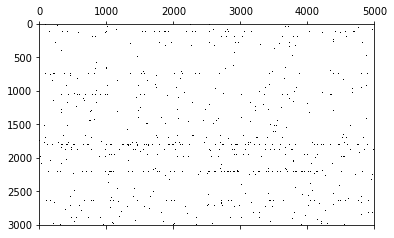

In [19]:
a

In [157]:
new_data = pd.DataFrame(X_n)

In [72]:
#new_data.iloc[5000]

In [161]:
mean_r = new_data.iloc[5000,:]

In [210]:
id = []
i = 0
for e in meanr:
    if(e<0.003):
        id.append(i)
    i = i+1
        


In [163]:
new_data = new_data.drop(columns = id, axis = 1)

In [168]:
new_data.shape[0]-1

5000

In [183]:
new_data1 = new_data.iloc[0:(new_data.shape[0]-1),:]
new_data1.shape

(5000, 312)

In [185]:
X_r = new_data1.values

In [187]:
#X_r = bar(X_r)
X_r.shape

(5000, 312)

In [188]:
X_r = bar(X_r)

In [189]:
X_r.shape

(313, 5000)

In [241]:

w = ridge(X_r,Y,0.01)

In [193]:
w.shape

(313,)

In [196]:
V.shape

(5000, 3000)

In [197]:
V_n = np.append(V,[f_mean],0)

In [217]:
new_data3 = pd.DataFrame(V_n)

In [218]:
new_data3 = new_data3.drop(columns = id, axis = 1)

In [219]:
new_data3 = new_data3.iloc[0:(new_data3.shape[0]-1),:]
new_data3.shape

(5000, 312)

In [221]:
V_r = new_data3.values

In [222]:
V_r = bar(V_r)

In [223]:
V_r.shape

(313, 5000)

In [242]:
pred = predict(V_r,w)

In [226]:
pred.shape

(5000,)

In [227]:

vl = vl_data.iloc[0:vl_data.shape[0],1].values

In [228]:
vl.shape

(5000,)

In [243]:
rmses = rmse(vl,pred)

In [244]:
rmses

2.3662567254657194

In [251]:
v_data = pd.read_csv("valData.csv",header = None)
vl_data = pd.read_csv("valLabels.csv",header = None)
V = v_data.iloc[0:v_data.shape[0],1:v_data.shape[1]].values
vl = vl_data.iloc[0:vl_data.shape[0],1].values

In [192]:
vl.shape[0]

5000

In [24]:
V = bar(V)
V.shape

(3001, 5000)

In [76]:
def predict(X,W):
    pred = np.dot(X.T,W)
    return pred

In [71]:
def rmse(vl, pred):
    add = 0
    err = vl-pred
    for val in err:
        add = add + (val ** 2)
    rmse = np.sqrt((add/5000))
    return rmse

In [72]:
ws = []
for lam in lamb:
    w = ridge(X,Y,lam)
    ws.append(w)
    

In [78]:
rmses = []
for pred in preds:
    rmses.append(rmse(vl,pred))

In [80]:
rmses,lamb

([2.1557423907528617,
  2.0530325105377134,
  2.0114747648585585,
  1.9915695142925645,
  1.981837920309302,
  1.9776266684623278,
  1.9766847176358402,
  1.9777938992723931,
  1.9802415379341158,
  1.9835860902507114],
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [35]:
X.shape

(3001, 5000)

In [253]:
Vx = V.T[0:4000] 
Vx.shape
Vt = V.T[4000:5000]
Vx.shape

(3000, 5000)

In [43]:
Vy = vl[0:4000]
Vty = vl[4000:5000]

In [41]:
M = V.T
XN = np.append(X.T,Vx,axis = 0)

In [42]:
XN = XN.T
XN.shape

(3001, 9000)

In [45]:
YN = np.append(Y,Vy,axis = 0)
YN.shape

(9000,)

In [47]:
ws = []
for lam in lamb:
    w = ridge(XN,YN,lam)
    ws.append(w)
    

In [49]:
preds = []
for w in ws:
    preds.append(predict(Vt.T,w))

In [50]:
rmses = []
for pred in preds:
    rmses.append(rmse(Vty,pred))

In [52]:
rmses,lamb

([0.8832767686013178,
  0.8628868545436539,
  0.8526915922437078,
  0.8471718723269467,
  0.8442036883757691,
  0.8427718174471781,
  0.8423261598801882,
  0.8425424207452722,
  0.8432173751555685,
  0.8442176211615625],
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [53]:
test = pd.read_csv("testData.csv",header= None)

In [54]:
Xt = test.iloc[0:test.shape[0],1:test.shape[1]].values 

In [55]:
Xt = bar(Xt)
Xt.shape

(3001, 5000)

In [60]:
W = ws[6]

In [ ]:
W = 

In [248]:
pred_s = predict(X,w) 

ValueError: shapes (3000,5000) and (313,) not aligned: 5000 (dim 1) != 313 (dim 0)

In [245]:
id1 = np.arange(0,5000)
id1.shape


(5000,)

In [247]:
df2 = pd.DataFrame()
df2['Id'] = id1
df2['Prediction'] = pred

In [65]:
df1.to_csv("predTestLabels.csv")

# 